**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING DATA**

In [ ]:
from google.colab import files
raw_data = files.upload()

Saving tvmarketing (1).csv to tvmarketing (1).csv


**CONVERTING DATASET INTO DATAFRAME**

We are converting the raw data in the dataset into dataframe using pandas.

In [ ]:
df = pd.read_csv("tvmarketing (1).csv")

In [ ]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


**SHALLOW COPY**

We are going to create a shallow copy of the data for backup.

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


**VISUALIZATION**

<Axes: xlabel='TV', ylabel='Sales'>

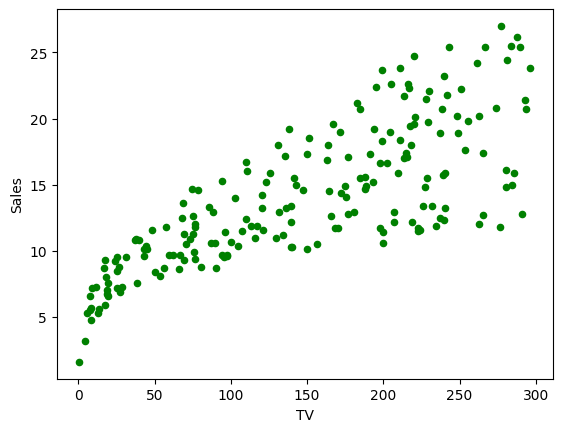

In [ ]:
df.plot(kind='scatter',
        x='TV',
        y='Sales',
        color='green')

The above dataset is a supervised model (both x and y values are given) and has continuous numbers. There is also only one x and y variable.Hence we wil be using Simple Linear Regression Analysis

**DATA PRE-PROCESSING**

***EXPLORATORY DATA ANALYSIS (EDA)***

Descriptive Statistics

In [ ]:
df.head()     # to see the spread on data of first 5 records

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
df.tail()     # to see the spread of data on the last 5 records

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [ ]:
df.columns    # to see all the columns present in the dataset

Index(['TV', 'Sales'], dtype='object')

In [ ]:
df.shape       # to see the number of rows and columns

(200, 2)

Technical Enquiry

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


Early Statistical Report

In [ ]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


***DATA CLEANING***

In [ ]:
df.isnull()         # checking if there are any NaN* values

,TV,Sales
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [ ]:
df.isnull().sum()    # sum of all NaN* values

TV       0
Sales    0
dtype: int64

*NaN = Not a number

=> version error

=> missing values

=> undesignated charecters

Since there are no null values, we do not need to performd ata cleaning.  

***X, Y SPLIT***

In [ ]:
x = df.drop(['Sales'], axis = 1).values

In [ ]:
y = df['Sales'].values

***TRAIN TEST SPLIT***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 1/3, random_state = 5)

In [ ]:
x_train.shape

(133, 1)

In [ ]:
y_train.shape

(133,)

In [ ]:
x_test.shape

(67, 1)

In [ ]:
y_test.shape

(67,)

**MODEL BUILDING**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
slr = LinearRegression()

In [ ]:
slr.fit(x_train,y_train)

LinearRegression()

***PREDICTION***

In [ ]:
y_predict = slr.predict(x_test)

In [ ]:
print(y_predict)

[ 7.71222165 12.75341641  8.63968181  8.97376693 16.10922657 12.77834814
 17.91428345  9.61201908 19.150897   12.2198775  21.00581733 11.51680286
 18.58245367 16.84221928 16.66271086 18.62234443 14.29918335 18.11373725
 10.55443828  8.58483202 14.55348694 13.87035768 19.84399895 18.43784967
 15.84993663 19.25561024 17.83450193 20.77644546  7.10887391 17.39071723
 19.85397164 11.42704865 21.38477954 16.40342092 16.70758797 11.75116107
  8.6496545  13.68586292 17.73976138  9.85136364 13.31188705 18.67719423
  7.63742648 15.47596076 18.12869628  8.96379424 16.13914464 18.07384649
 15.34631579  7.13380564 12.88306138 11.25252658 17.06161846 16.59788838
 10.64419249 11.21762216  7.72219434 20.71660932 19.77419012 10.4896158
  9.23804321  9.5471966  17.25109957 16.96687791  7.93162083 17.38573088
 13.79057616]


In [ ]:
y_test

array([ 6.6, 14.2, 10.9, 10.1, 15.6, 11.6, 11.6, 11.8, 18.9, 12.4, 15.9,
        9.5, 12.5, 16.6, 23.7, 20.7, 18.5, 21.5,  9.4, 10.8, 10.5, 15. ,
       20.2, 11.9, 21.2, 22.2, 11.5, 24.4,  5.5, 21.7, 12. , 15.3, 20.7,
       19.2, 11.4, 10.7,  7.6, 12.2, 20.1,  9.7, 12.9, 15.7,  8. , 14.9,
       15.5, 10.4, 14.9, 14.8, 14.4,  6.6, 15.2,  8.7, 12.9, 16.6, 14.6,
       10.6,  7.6, 14.8, 24.2, 12.6,  8.4,  8.7, 18.4, 22.6,  9.2, 17. ,
       15.5])

**EVALUATION**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae = mean_absolute_error(y_test,y_predict)
mae

2.4678355858862537

In [ ]:
mse = mean_squared_error(y_test, y_predict)
mse

10.198215008451013

In [ ]:
rmse = np.sqrt(mse)
rmse

3.193464421040418

In [ ]:
lrmse = np.log(rmse)
lrmse

1.1611063529023071

Visualisation of predicted model


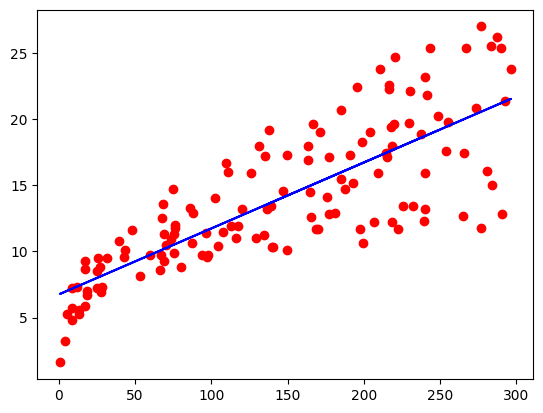

In [ ]:
# Visualising the Training set results

plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, slr.predict(x_train), color = 'blue')

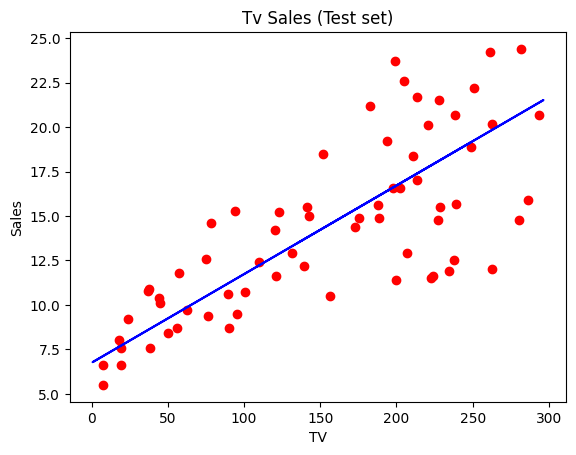

In [ ]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, slr.predict(x_train), color = 'blue')
plt.title('Tv Sales (Test set)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()